In [91]:
import os
import sys
from PIL import Image, ExifTags
import pprint
import requests
from collections import defaultdict
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator


<h1>1 Part(a)</h1>

In [4]:
def func_name(name):
    MAC_URL = 'http://macvendors.co/api/%s'
    r = requests.get(MAC_URL % name)
#     pprint.pprint(r.json())
    return (r.json()['result']['company'])

In [5]:
company = defaultdict(lambda : 0)
company1 = defaultdict(lambda : 0)


directory = './Isis Admin\'s Hacked Phones/'


for file in os.listdir(directory):
    first_level = directory + file
    for files in os.listdir(first_level):
        second_level = first_level + "/" + files
        for f in os.listdir(second_level):
            if f.endswith("Snapshots") or f.endswith("snapshots") or f.endswith("snapshot") or f.endswith("Snapshot") :
                third_level = second_level+"/" + f
                for filess in os.listdir(third_level):
                    try:
                        img = Image.open(os.path.join(third_level, filess))
                        exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
                        if(exif["Make"]):
                            company[exif["Make"].rstrip('\x00').lower()] += 1
                        else:
                            company["Unknown"] += 1
                        break
                    except:
                        
                        f = open(os.path.join(second_level,"ifconfig.txt"))
                        name = func_name((" ").join(f.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n "))
                        company[name.split(" (")[0].lower()] += 1

                        break
                break
            
            elif f == "ifconfig.txt" or f == "ifconfig":
                fo = open(os.path.join(second_level, f))
                

                try:
                    var = (" ").join(fo.readlines()).split("Name         : wlan0 - wlan0")[1].split("IPv4 Address")[0].split(": ")[1].strip("\n ")
                    if len(var) == 17:
                        name = func_name(var)
                        company[name.split(" (")[0].lower()] += 1
                    elif len(var) == 55:
                        name = func_name(var.split("\n")[0])
                        company[name.split(" (")[0].lower()] += 1
                except:
                    pass


for i in company:
    if len(i.split(" ")) > 1:
        company1[i.split()[0]]+= company[i]
    else:
        company1[i] = company[i]


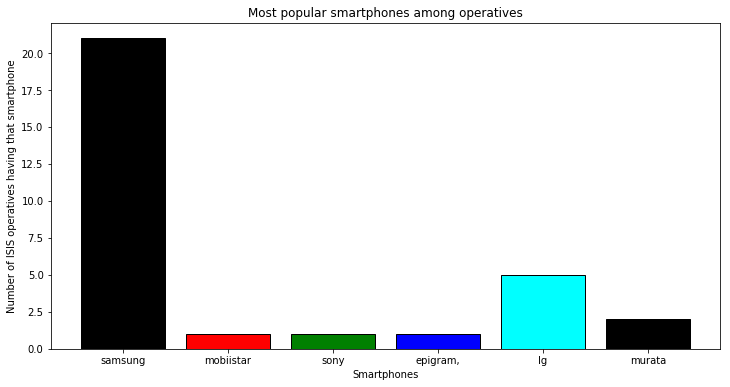

In [6]:
figure(figsize=(12,6))
plt.bar(company1.keys(), company1.values(), align='center',color=['black', 'red', 'green', 'blue', 'cyan'],edgecolor='black')
plt.title('Most popular smartphones among operatives')
plt.xlabel("Smartphones")
plt.ylabel("Number of ISIS operatives having that smartphone")
plt.show()


<h1>1 Part(b)</h1>

In [107]:
log_list = []
outgoing = defaultdict(lambda: 0)
incoming = defaultdict(lambda: 0)
# num_dict
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".txt"):
            name = os.path.join(root,file)
            if name[-17:] == '/Calllog Dump.txt':
                log_list.append(name)

                
for files in log_list:
    f = open(files)
    var = ''.join(f.readlines()).split("\n")
    for idx, val in enumerate(var):
        if val.startswith("Number"):
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'outgoing':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                outgoing[index] += 1
            if var[idx+3].strip("\n").split(": ")[1].lower() == 'incoming':
                country = f.name.split("/")[2].split(" ")[0]
                index = (var[idx].strip("\n").split(": ")[1],var[idx+1].strip("\n").split(": ")[1].lower(),country)
                incoming[index] += 1



In [108]:
arr = sorted(outgoing.items(), key=operator.itemgetter(1))[-5:]
arr1 = sorted(incoming.items(), key=operator.itemgetter(1))[-5:]

print("Top 5 most popular outgoing numbers are :")
for key,value in arr:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    



Top 5 most popular outgoing numbers are :
Number : 7006348792 Name : masroor Country : India ==> 189
Number : 123 Name : null Country : India ==> 215
Number : +917780809871 Name : adal bhat Country : India ==> 237
Number : 0933637039 Name : جدي ندى Country : Turkey ==> 250
Number : 00966550326715 Name : null Country : Yemen ==> 264


<h1>1 Part(c)</h1>

In [109]:
print("Top 5 most popular incoming numbers are :")
for key,value in arr1:
    
    print("Number : " + key[0] + " Name : " + key[1] + " Country : " + key[2] + " ==> " + str(value))
    

Top 5 most popular incoming numbers are :
Number : +917780809871 Name : adal bhat Country : India ==> 104
Number : +963997421993 Name : هتلر Country : Syria ==> 130
Number : +917780848045 Name : musaib dhurani Country : India ==> 159
Number : MTN Name : null Country : Syria ==> 229
Number : Syriatel Name : null Country : Syria ==> 367
